In [1]:
import random
from functools import reduce
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's start with the 2 piece case. The largest product is when $d_1=d_2=5$

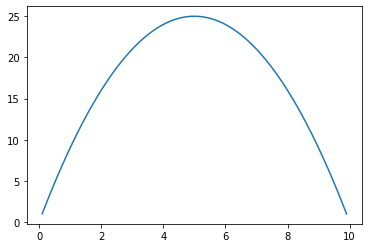

In [2]:
x=np.arange(0.1, 10, 0.1)
plt.plot(x, x * (10-x))
plt.show()

$f(x) = x (10 - x) = 10 x - x^2$

$\frac{df}{dx} = 10 - 2 x = 0$

$x = 5$


Similarly, let's check the 3 piece case. The largest product is when:

$f(x, y) = x y (10-x-y) = 10 x y - x^2 y - x y^2$

$\frac{\partial f}{\partial x}(x, y) = 10 y - 2 x y - y^2$

$\frac{\partial f}{\partial y}(x, y) = 10 x - x^2 - 2 x y$

At $x_0 = y_0 = \frac{10}{3}$ these are both 0:

$\frac{\partial f}{\partial x}(\frac{10}{3}, \frac{10}{3}) = 10 (\frac{10}{3}) - 2 (\frac{10}{3})^2 - (\frac{10}{3})^2$

$ = \frac{100}{3} - 3 (\frac{100}{9}) = \frac{100}{3} - \frac{100}{3} = 0$ 

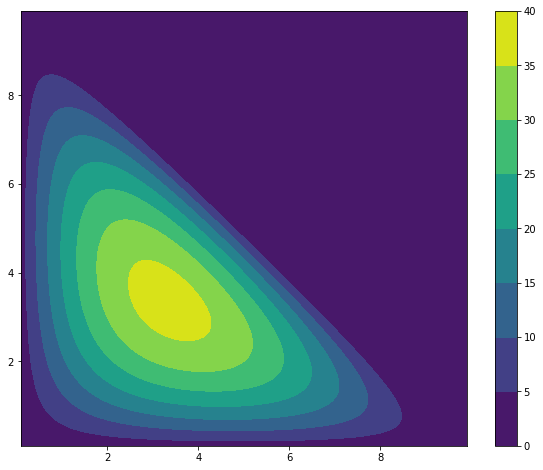

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(0.1, 10, 0.1)
y = np.arange(0.1, 10, 0.1)
xv, yv = np.meshgrid(x, y, sparse=True)
z = xv * yv * (10-xv-yv)
cs = ax.contourf(x, y, np.where(z > 0, z, 0))
fig.colorbar(cs)
plt.show()

In [4]:
dmax={'n': [], 'volume': []} 
for i in range(2,11):
    dmax['n'].append(i)
    dmax['volume'].append((10/i)**i)
dfmax=pd.DataFrame(dmax)
dfmax

,n,volume
0,2,25.000000
1,3,37.037037
2,4,39.062500
3,5,32.000000
4,6,21.433471
5,7,12.142657
6,8,5.960464
7,9,2.581175
8,10,1.000000


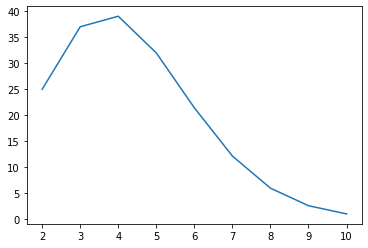

In [5]:
plt.plot(dfmax['n'], dfmax['volume'])
plt.show()

In [6]:
[random.uniform(0, 10)] * 3

[4.369225570714193, 4.369225570714193, 4.369225570714193]

In [7]:
d=[0]
d.extend(sorted([random.uniform(0, 10) for x in range(3)]))
d.append(10)
d

[0, 1.4667382728215095, 6.193638852728864, 7.8225124596882365, 10]

In [8]:
[d[i+1]-d[i] for i in range(len(d)-1)]

[1.4667382728215095, 4.726900579907355, 1.6288736069593721, 2.1774875403117635]

In [9]:
def random_fragments(n, total=10):
    d=[0]
    d.extend(sorted([random.uniform(0, total) for x in range(n-1)]))
    d.append(total)
    return [d[i+1]-d[i] for i in range(len(d)-1)]

In [10]:
random_fragments(4)

[0.29266976246605014,
 1.6542540670794625,
 7.800020196576142,
 0.2530559738783449]

In [11]:
data={"i":[], "n":[], "lengths":[], "volume":[]}
for n in range(2,11):
    for i in range(5000):
        data["i"].append(i)
        data["n"].append(n)
        t=random_fragments(n)
        data["lengths"].append(t)
        data["volume"].append(reduce(lambda a, b: a * b, t))
df=pd.DataFrame(data)

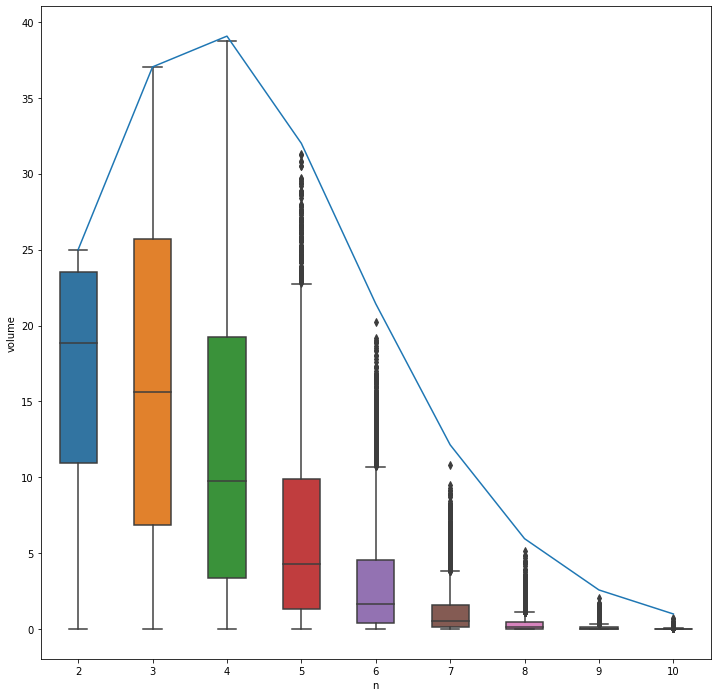

In [23]:
f, ax = plt.subplots(figsize=(12,12))

sns.boxplot(x="n", y="volume", data=df, ax=ax, width=0.5)
ax.plot(dfmax['n']-2, dfmax['volume'])
plt.show()

In [13]:
df100=pd.DataFrame({"n": np.arange(2, 100)})
df100["product"]=(100/df100["n"])**df100["n"]
df100[0:10]

,n,product
0,2,2.500000e+03
1,3,3.703704e+04
2,4,3.906250e+05
3,5,3.200000e+06
4,6,2.143347e+07
5,7,1.214266e+08
6,8,5.960464e+08
7,9,2.581175e+09
8,10,1.000000e+10
9,11,3.504939e+10


In [14]:
df100[df100['product'] == df100['product'].max()]

,n,product
35,37,9.474062e+15


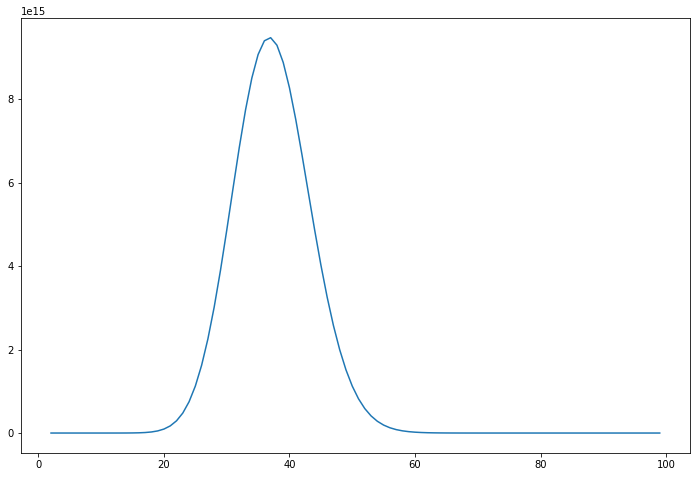

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df100["n"], df100["product"])
#ax.set_yscale("log")
plt.show()